# **Data Prep & EDA**

In [20]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_blobs, fetch_openml
import sklearn.datasets as datasets
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,f1_score
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

In [2]:
# Load Dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/wine_data.csv"
df = pd.read_csv(url)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Y
0,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0,0
1,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560.0,2
2,12.16,1.61,2.31,22.8,90.0,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495.0,1
3,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0,0
4,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


In [3]:
# Dataset Infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  Y    

In [4]:
# Rename OD column to something easier
df.rename(columns={'od280/od315_of_diluted_wines': 'optical_density_ratio'}, inplace=True)

In [5]:
# Check missing value
df.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


In [6]:
# Dataset Descriptions
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,optical_density_ratio,proline,Y
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


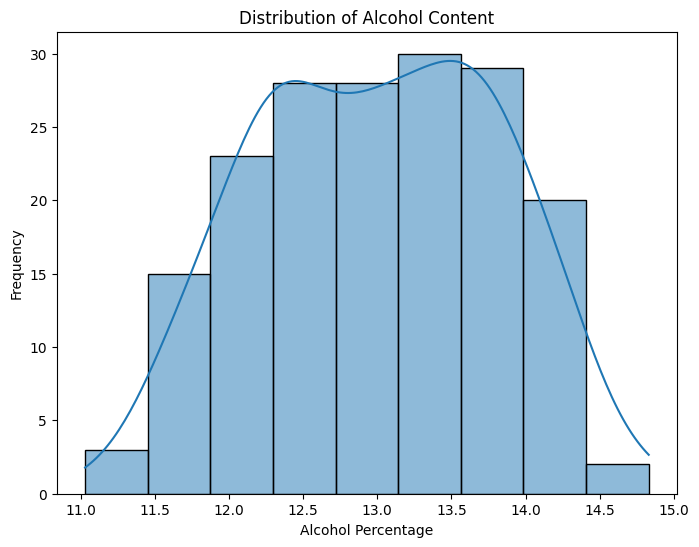

In [7]:
# Visualization| Histogram of Alcohol Content
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='alcohol', kde=True)
plt.title('Distribution of Alcohol Content')
plt.xlabel('Alcohol Percentage')
plt.ylabel('Frequency')
plt.show()

**Explanation for Histogram of Alcohol Content:**

This histogram shows the distribution of alcohol content across all the wines in the dataset. The shape of the histogram suggests that the alcohol content is roughly normally distributed, with a peak around 13%. The distribution appears slightly skewed to the left.

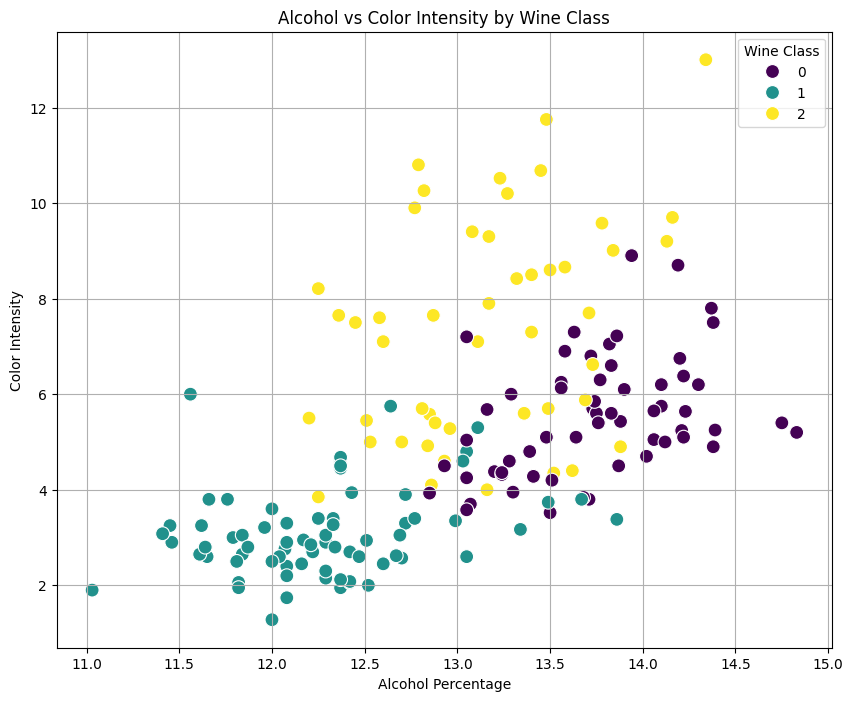

In [8]:
# Visualization | Alcohol vs Color Intensity by Class
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='alcohol', y='color_intensity', hue='Y', palette='viridis', s=100)
plt.title('Alcohol vs Color Intensity by Wine Class')
plt.xlabel('Alcohol Percentage')
plt.ylabel('Color Intensity')
plt.legend(title='Wine Class')
plt.grid(True)
plt.show()

**Explanation for Scatter Plot of Alcohol vs Color Intensity by Wine Class:**

This scatter plot visualizes the relationship between alcohol content and color intensity, with points colored according to their wine class (0, 1, or 2).

*   **Class 0** wines (purple) tend to have higher alcohol content and a wide range of color intensities, with some having relatively low color intensity and others having higher.
*   **Class 1** wines (green) appear to have lower alcohol content and generally lower color intensity compared to Class 0 and Class 2.
*   **Class 2** wines (yellow) show a mix of alcohol content but often have higher color intensity than Class 1, and some overlap with Class 0 in terms of alcohol content.

This visualization suggests that a combination of alcohol content and color intensity could be useful features for distinguishing between the wine classes, particularly for separating Class 1 from the other two classes.

# **PRISM Algorithm & Rules Generation**

In [10]:
# Separate features (X) and target (y)
X = df.drop('Y', axis=1)
y = df['Y']

In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (142, 13)
Testing set shape: (36, 13)


In [12]:
# PRISM rules from Guidance
class PrismRules:
    def __init__(self, min_coverage=10, min_prob=0.75, nbins=3, verbose=0):
        """
        Class to generate PRISM rules for a supplied dataset.

        :param min_coverage: The minimum number of rows each rule must cover.
        :param min_prob: The minimum probability for each rule. The target class must be the target value in the
            remaining rows (the rows not covered by previous rules) with at least this probability.
        :param nbins: The number of bins each numeric column is divided into.
        :param verbose: If 0, no output is produced other than the induced rules. If 1, progress indication is
            presented as each rule is induced.
        """

        self.min_coverage = min_coverage
        self.min_prob = min_prob
        self.nbins = nbins
        self.bin_ranges = {}
        self.verbose = verbose
        self.default_target = None
        self.predict_dict = {}
        self.target_column = ""

        # For improved performance, integer values are used for each value. This dictionary maps the integer codes
        # to the original values, and is used to display the rules and target values. Where the column is numeric,
        # this maps to the bin label.
        self.int_to_values_map = {}

    def __get_next_term(self, df, target_col, target_val, cols_exclude_list):
        """
        Get the next term (a column-value pair) for the current rule.

        :param df: The dataframe for the current rule. This is the set of rows matching the rule so far.
        :param target_col: Target column
        :param target_val: The current target value within the target column
        :param cols_exclude_list: Columns for which we already have terms for this rule.
        :return: a single term in tuple format, with a column name and value from that column, along with the
            probability and coverage (frequency) of the rule on the remaining rows.
        """

        max_prob = -1
        # In the event of ties with respect to probability, we take the term with the greatest frequency
        max_prob_freq = 0
        term = None
        for col_name in df.drop(columns=[target_col]).columns:
            if col_name in cols_exclude_list:
                continue
            for val in df[col_name].unique():
                sub_df_1 = df[df[col_name] == val]
                sub_df_2 = df[(df[col_name] == val) & (df[target_col] == target_val)]
                prob = len(sub_df_2) / len(sub_df_1)
                freq = len(sub_df_2)
                if freq < self.min_coverage:
                    continue
                if (prob > max_prob) or ((prob == max_prob) and (freq > max_prob_freq)):
                    max_prob = prob
                    max_prob_freq = freq
                    term = (col_name, val, prob, freq)
        return term

    def __get_next_rule(self, df_rule, target_col, target_val):
        """
        Given a specified target_val in the target_col, find the first or next rule. If not the first, the dataframe
        should just contain rows not covered by the previous rules for this target value.

        :param df_rule: the full original dataframe, minus the rows covered by other rules for the current target
        :param target_col: the target column
        :param target_val: the target value
        :return: a list of terms for the new rule, and a dataframe with the rows for this rule
        """

        terms_list = []
        cols_exclude_list = []  # Do not create terms for the same feature in the same rule
        df = df_rule.copy()
        target_val_remaining = df[target_col].tolist().count(target_val)
        len_df = len(df)
        while target_val_remaining < len_df:
            term = self.__get_next_term(df, target_col, target_val, cols_exclude_list)
            if term is None:
                break
            col, val, prob, freq = term
            cols_exclude_list.append(col)
            if len(cols_exclude_list) == (len(df.columns) - 1):
                break
            df = df[(df[col] == val)]
            terms_list.append((term, df))
            target_val_remaining = df[target_col].tolist().count(target_val)
            len_df = len(df)

        # Check the terms list for the optimal set of terms, which is the set with the highest probability of the
        # target class given the terms.
        max_prob = 0
        max_prob_idx = -1
        max_prob_df = None
        for term_idx, term in enumerate(terms_list):
            if term[0][2] > max_prob:
                max_prob = term[0][2]
                max_prob_idx = term_idx
                max_prob_df = term[1]
        optimal_terms_list = terms_list[:max_prob_idx + 1]
        optimal_terms_list = [x for x, y in optimal_terms_list]

        if max_prob < self.min_prob:
            return None, None

        # Convert the integer codes used in the dataframe to the original values for the relevant column
        formatted_terms = []
        for t in optimal_terms_list:
            if t[1] == "NONE":
                formatted_terms.append(t)
            else:
                formatted_terms.append((t[0], self.int_to_values_map[t[0]][t[1]], t[2], t[3]))

        return formatted_terms, max_prob_df

    def __get_rules_for_target_val(self, df_full, target_col, target_val):
        """
        Get the full set of rules for the specified value in the target column
        :param df_full:
        :param target_col:  Name of target column
        :param target_val:  Value in the target column for which this execution of this function generates rules.
        :return: array of strings.
        """

        rules_for_val = []
        num_rows_curr_target = df_full[target_col].tolist().count(target_val)
        df = df_full.copy()  # Create a temporary dataframe that shrinks as the rules are formed
        is_first_rule = True
        target_val_remaining = df[target_col].tolist().count(target_val)
        while target_val_remaining > self.min_coverage:
            if self.verbose:
                print(f"  Determining next rule. {target_val_remaining:,} rows remaining for target class")
            num_rows_curr_target_remaining = df[target_col].tolist().count(target_val)
            terms_list, rule_df = self.__get_next_rule(df, target_col, target_val)
            if not terms_list:
                break

            if target_val in self.predict_dict:
                self.predict_dict[target_val].append(terms_list)
            else:
                self.predict_dict[target_val] = [terms_list]

            # Add a rule in string format representing the list of terms returned
            rule_str = ""
            for term in terms_list:
                rule_str += str(term[0]) + " = " + str(term[1]) + " AND "
            rule_str = rule_str[:-5]  # Remove the trailing "AND"
            num_matching_target = rule_df[target_col].tolist().count(target_val)
            rule_str += "\n   Support:  "
            if is_first_rule:
                rule_str += f"the target has value: '{self.int_to_values_map[target_col][target_val]}' for "
                rule_str += f"{terms_list[-1][2] * 100:.3f}% of the {num_matching_target} rows matching the rule "
                rule_str += "\n   Coverage: "
                rule_str += f"the rule matches: {num_matching_target} out of {num_rows_curr_target} rows "
                rule_str += f"for target value: '{self.int_to_values_map[target_col][target_val]}'. This is:"
            else:
                rule_str += f"The target has value: '{self.int_to_values_map[target_col][target_val]}' for "
                rule_str += f"{terms_list[-1][2] * 100:.3f}% of the {num_matching_target} remaining rows matching the "
                rule_str += "rule"
                rule_str += "\n   Coverage: "
                rule_str += f"The rule matches: {num_matching_target} out of {num_rows_curr_target_remaining} rows "
                rule_str += f"remaining for target value: '{self.int_to_values_map[target_col][target_val]}'. This is:"
                rule_str += f"\n      {(num_matching_target * 100.0 / num_rows_curr_target_remaining):.3f}% of "
                rule_str += f"remaining rows for target value: '{self.int_to_values_map[target_col][target_val]}'"
            rule_str += f"\n      {(num_matching_target * 100.0 / num_rows_curr_target):.3f}% of total rows for target "
            rule_str += f"value: '{self.int_to_values_map[target_col][target_val]}'"
            rule_str += f"\n      {(num_matching_target * 100.0 / len(df_full)):.3f}% of total rows in data"
            rules_for_val.append(rule_str)
            is_first_rule = False

            # Remove all rows for this rule
            df = df.loc[list(set(df.index) - set(rule_df.index))]
            target_val_remaining = df[target_col].tolist().count(target_val)
        return rules_for_val

    def __display_rules(self, df, target_col, rules_dict, display_stats):
        for target_val in rules_dict:
            print()
            print('........................................................................')
            print(f"Target: {self.int_to_values_map[target_col][target_val]}")
            print('........................................................................')
            if len(rules_dict[target_val]) == 0 and display_stats:
                print((f"  No rules imputed for target value {self.int_to_values_map[target_col][target_val]}. There "
                       f"are {df[target_col].tolist().count(target_val)} rows for this class."))
            for r in rules_dict[target_val]:
                if display_stats:
                    print(r)
                else:
                    print(r.split("\n")[0])

    def get_prism_rules(self, df, target_col, display_stats=True):
        """
        Given a dataframe with a specified target column, find a set of rules that describe the patterns associated
        with the target column. The rules are displayed in a formatted form.

        :param df: pandas dataframe. Must include the target column.
        :param target_col: Name of the target column
        :param display_stats: If True, the support and coverage for each rule will be displayed
        :return: array of strings, with each element of the array representing one rule.
        """

        # PRISM requires all columns be categorical, so bin any numeric features, including the target column if
        # necessary.
        new_vals_dict = {}
        for col_name in df.columns:
            if is_numeric_dtype(df[col_name]) and (df[col_name].nunique() > 10):
                try:
                    if self.nbins == 3:
                        vals = ['Low', "Med", 'High']
                        bin_ids, bin_ranges = pd.qcut(df[col_name], 3, labels=vals, retbins=True)
                    else:
                        vals = [f"Bin_{x}" for x in range(self.nbins)]
                        bin_ids, bin_ranges = pd.qcut(df[col_name], self.nbins, labels=vals, retbins=True)
                    self.bin_ranges[col_name] = bin_ranges
                    vals_to_int_map = {x: y for x, y in zip(vals, range(len(vals)))}
                    int_to_vals_map = {y: x for x, y in zip(vals, range(len(vals)))}
                    new_vals_dict[col_name] = bin_ids.map(vals_to_int_map)
                    self.int_to_values_map[col_name] = int_to_vals_map
                except:
                    # The qcut() method may fail if the data is sufficiently skewed, and the bins are non-unique, In
                    # this case we do not include the column in the model.
                    pass
            else:
                vals = df[col_name].unique()
                vals_to_int_map = {x: y for x, y in zip(vals, range(len(vals)))}
                int_to_vals_map = {y: x for x, y in zip(vals, range(len(vals)))}
                new_vals_dict[col_name] = df[col_name].map(vals_to_int_map)
                self.int_to_values_map[col_name] = int_to_vals_map
        df = pd.DataFrame(new_vals_dict)

        # Remove any columns with only 1 unique value
        drop_cols = []
        for col_name in df.columns:
            if df[col_name].nunique() < 2:
                drop_cols.append(col_name)
        df = df.drop(columns=drop_cols)

        # Fill any NaN and None values
        for col_name in df.columns:
            if df[col_name].dtype.name == "category":
                df[col_name] = df[col_name].cat.add_categories("NONE").fillna("NONE")
            else:
                df[col_name] = df[col_name].fillna("NULL")

        # Loop through each value in the target column and find the set of rules for this value
        target_vals = sorted(df[target_col].unique())
        if self.verbose:
            print(f"Determining rules for each of {len(target_vals)} target classes:")
        rules_dict = {}
        for target_val in target_vals:
            if self.verbose >= 1:
                print(f"Determining rules for target class: {self.int_to_values_map[target_col][target_val]}")
            rules_dict[target_val] = self.__get_rules_for_target_val(df, target_col, target_val)

        self.__display_rules(df, target_col, rules_dict, display_stats)

        self.default_target = df[target_col].mode().values[0]
        self.target_column = target_col

        return rules_dict

    def predict(self, X_in, leave_unknown=False):
        X = X_in.copy()
        X = X.reset_index(drop=True)
        if leave_unknown:
            ret = ["NO PREDICTION"]*len(X)
        else:
            ret = [self.default_target]*len(X)
        is_set = [False]*len(X)

        for col_name in X.columns:
            if col_name not in self.bin_ranges:
                continue
            bin_ranges = self.bin_ranges[col_name]
            for i in range(len(X)):
                v = X.loc[i, col_name]
                for bin_idx, bin_limit in enumerate(bin_ranges):
                    if v < bin_limit:
                        X.loc[i, col_name] = bin_idx - 1
                        break
            if col_name in self.int_to_values_map:
                X[col_name] = X[col_name].map(self.int_to_values_map[col_name])

        for i in range(len(X)):
            row = X.iloc[i]
            found_rule = False
            for key in self.predict_dict.keys():
                rules = self.predict_dict[key]
                for rule in rules:
                    all_terms_true = True
                    for term in rule:
                        term_feature_name = term[0]
                        term_value = term[1]
                        if row[term_feature_name] != term_value:
                            all_terms_true = False
                            break
                    if all_terms_true:
                        ret[i] = key
                        is_set[i] = True
                        found_rule = True
                        break
                if found_rule:
                    break
        ret = pd.Series(ret).map(self.int_to_values_map[self.target_column])
        if leave_unknown:
            ret = ret.fillna("NO PREDICTION")
            ret = ret.astype(str)
        return ret

    def get_bin_ranges(self):
        if self.bin_ranges is None:
            print("No columns were binned.")
        else:
            return self.bin_ranges

In [14]:
# Instantiate the PrismRules class and generate rules
prism = PrismRules(min_coverage=5, min_prob=0.75, nbins=3, verbose=1)

# Combine X_train and y_train into a single DataFrame for the get_prism_rules function
train_df = X_train.copy()
train_df['Y'] = y_train

rules = prism.get_prism_rules(train_df, 'Y')

Determining rules for each of 3 target classes:
Determining rules for target class: 0
  Determining next rule. 48 rows remaining for target class
  Determining next rule. 17 rows remaining for target class
  Determining next rule. 8 rows remaining for target class
Determining rules for target class: 2
  Determining next rule. 40 rows remaining for target class
Determining rules for target class: 1
  Determining next rule. 54 rows remaining for target class
  Determining next rule. 17 rows remaining for target class
  Determining next rule. 12 rows remaining for target class

........................................................................
Target: 0
........................................................................
proline = High AND alcohol = High
   Support:  the target has value: '0' for 100.000% of the 31 rows matching the rule 
   Coverage: the rule matches: 31 out of 48 rows for target value: '0'. This is:
      64.583% of total rows for target value: '0'
      21.83

**TARGET 0**

*Rule 1: proline = High AND alcohol = High*

- Meaning: This rule applies to wines that have a "High" level of Proline and a "High" level of Alcohol content.
- Predicted Class: This rule predicts that such wines belong to Class 0.
- Strength/Specificity: This rule has a Support of 100.000%, meaning all 31 wines matching these conditions in the training data belong to Class 0. It covers 64.583% of the total rows for Class 0 in the training data. This is a strong and specific rule for identifying a significant portion of Class 0 wines.

*Rule 2: proline = High AND alcalinity_of_ash = Low*

- Meaning: This rule applies to wines that have a "High" level of Proline and a "Low" level of Alkalinity of Ash.
- Predicted Class: This rule predicts that such wines belong to Class 0.
- Strength/Specificity: This rule has a Support of 100.000%, meaning all 9 remaining wines matching these conditions belong to Class 0. It covers 52.941% of the remaining rows for Class 0 (those not covered by Rule 1) and 18.750% of the total rows for Class 0. This is another strong rule, covering a smaller but still significant portion of Class 0 wines not identified by the first rule.



**TARGET 1**

*Rule 1: color_intensity = Low AND alcohol = Low*

- Meaning: This rule applies to wines that have a "Low" level of Color Intensity and a "Low" level of Alcohol content.
- Predicted Class: This rule predicts that such wines belong to Class 1.
- Strength/Specificity: This rule has a Support of 100.000%, meaning all 37 wines matching these conditions belong to Class 1. It covers 68.519% of the total rows for Class 1 in the training data. This is a strong and highly covering rule for identifying a large portion of Class 1 wines.

*Rule 2: color_intensity = Low AND hue = Med*


- Meaning: This rule applies to wines that have a "Low" level of Color Intensity and a "Medium" level of Hue.
- Predicted Class: This rule predicts that such wines belong to Class 1.
- Strength/Specificity: This rule has a Support of 100.000%, meaning all 5 remaining wines matching these conditions belong to Class 1. It covers 29.412% of the remaining rows for Class 1 (those not covered by Rule 1) and 9.259% of the total rows for Class 1. This is another strong rule that helps identify a smaller group of Class 1 wines not covered by the first rule for Class 1.


**TARGET 2**

*Rule 1: flavanoids = Low AND hue = Low*

- Meaning: This rule applies to wines that have a "Low" level of Flavanoids and a "Low" level of Hue.
- Predicted Class: This rule predicts that such wines belong to Class 2.
- Strength/Specificity: This rule has a Support of 100.000%, meaning all 36 wines matching these conditions belong to Class 2. It covers 90.000% of the total rows for Class 2 in the training data. This is a very strong and highly covering rule for identifying Class 2 wines.



# **Model Evaluation**

In [15]:
# Make predictions on the testing data
y_pred = prism.predict(X_test)

# Display the predictions
print("Predicted labels for the testing data:")
print(y_pred)

Predicted labels for the testing data:
0     2
1     0
2     1
3     0
4     1
5     1
6     0
7     2
8     1
9     0
10    1
11    1
12    2
13    2
14    0
15    2
16    1
17    0
18    2
19    1
20    1
21    1
22    1
23    0
24    0
25    1
26    1
27    1
28    2
29    1
30    1
31    1
32    0
33    1
34    0
35    2
dtype: int64


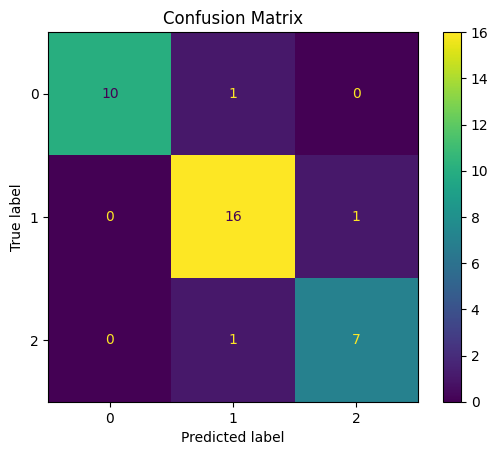

In [23]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

- Class 0: The model correctly predicted 10 instances of Class 0. It misclassified 1 instance of Class 0 as Class 1.
- Class 1: The model correctly predicted 16 instances of Class 1. It misclassified 1 instance of Class 1 as Class 2.
- Class 2: The model correctly predicted 7 instances of Class 2. It misclassified 1 instance of Class 2 as Class 1.


In [24]:
# Generate and print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.89      0.94      0.91        17
           2       0.88      0.88      0.88         8

    accuracy                           0.92        36
   macro avg       0.92      0.91      0.91        36
weighted avg       0.92      0.92      0.92        36




- Precision:
    - For Class 0, when the model predicts Class 0, it is correct 100% of the time.
    - For Class 1, when the model predicts Class 1, it is correct 89% of the time.
    - For Class 2, when the model predicts Class 2, it is correct 88% of the time.
- Recall:
    - For Class 0, the model correctly identifies 91% of all actual Class 0 instances.
    - For Class 1, the model correctly identifies 94% of all actual Class 1 instances.
    - For Class 2, the model correctly identifies 88% of all actual Class 2 instances.
    
- F1-score: This is the harmonic mean of precision and recall, providing a balanced measure. Class 0 has the highest F1-score (0.95), followed by Class 1 (0.91), and then Class 2 (0.88).

- Support: This is the number of actual instances in the testing set for each class (11 for Class 0, 17 for Class 1, and 8 for Class 2).

- Accuracy: The overall accuracy of the model on the testing data is 92%, meaning it correctly predicted the class for 92% of the instances in the test set.


# **Prediction of New Data Points**

In [25]:
# Create the new data points
new_data = {
    'alcohol': [14.0, 14.00],
    'malic_acid': [2.0, 2.0],
    'ash': [2.3, 2.2],
    'alcalinity_of_ash': [19.0, 11.0],
    'magnesium': [95.0, 95.0],
    'total_phenols': [2.2, 2.5],
    'flavanoids': [0.14, 0.5],
    'nonflavanoid_phenols': [0.14, 0.5],
    'proanthocyanins': [1.6, 1.5],
    'color_intensity': [7.0, 6.0],
    'hue': [0.7, 0.6],
    'optical_density_ratio': [3.2, 3.0],
    'proline': [550.0, 1400.0]
}

new_df = pd.DataFrame(new_data)

# Make predictions on the new data points
new_predictions = prism.predict(new_df)

# Display the predictions
print("Predictions for the new data points:")
print(new_predictions)

Predictions for the new data points:
0    1
1    0
dtype: int64


In [26]:
# Assign predictions to a new column in the DataFrame
new_df['Predicted Class'] = new_predictions

# Display the new data and prediction
print("New Data Points with Predictions:")
display(new_df)

New Data Points with Predictions:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,optical_density_ratio,proline,Predicted Class
0,14.0,2.0,2.3,19.0,95.0,2.2,0.14,0.14,1.6,7.0,0.7,3.2,550.0,1
1,14.0,2.0,2.2,11.0,95.0,2.5,0.50,0.50,1.5,6.0,0.6,3.0,1400.0,0


New Data Point 1 (Predicted as Class 1):

- Predicted Class: 1
  - Explanation: The first new data point was predicted as Class 1. Based on its features (alcohol: 14.0, color_intensity: 7.0, hue: 0.7, etc.) and comparing them to the conditions of the rules for Target 1, it seems this data point didn't perfectly match the explicit rules generated (e.g., color_intensity = Low AND alcohol = Low). However, as mentioned before, the prism.predict() method likely has a way to handle instances that don't perfectly match any rule, possibly by assigning the class of the "closest" rule or a default class. Given the prediction is Class 1, the model's logic determined Class 1 was the most appropriate classification for this specific combination of features, even if an exact rule match wasn't identified based on our interpretation of the binning.


New Data Point 2 (Predicted as Class 0):

- Predicted Class: 0
  - Explanation: The second new data point was predicted as Class 0. This is because its features directly match the conditions of the first rule generated for Target 0: proline = High AND alcohol = High. The second data point has a high value for proline (1400.0) and a high value for alcohol (14.0). These values fall into the "High" bins for both features as determined by the PrismRules class's binning process. Since this rule has 100% support in the training data, the PRISM algorithm confidently classifies any instance matching these conditions as Class 0.
